# Question 1 :

Use the IRIS dataset and create a decision tree and check the accuracy label.

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import tree
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
#loading dataset from github and not from sklearn database 
data = pd.read_csv("https://raw.githubusercontent.com/45hook/-LetsUpgrade-AI-ML/main/material/iris.csv")
data.head()


,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [73]:
data.describe()

,150,4,setosa,versicolor,virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [74]:
data.shape



(150, 5)

In [75]:
data.info

<bound method DataFrame.info of      150    4  setosa  versicolor  virginica
0    5.1  3.5     1.4         0.2          0
1    4.9  3.0     1.4         0.2          0
2    4.7  3.2     1.3         0.2          0
3    4.6  3.1     1.5         0.2          0
4    5.0  3.6     1.4         0.2          0
..   ...  ...     ...         ...        ...
145  6.7  3.0     5.2         2.3          2
146  6.3  2.5     5.0         1.9          2
147  6.5  3.0     5.2         2.0          2
148  6.2  3.4     5.4         2.3          2
149  5.9  3.0     5.1         1.8          2

[150 rows x 5 columns]>

In [76]:
data.isnull().sum()

150           0
4             0
setosa        0
versicolor    0
virginica     0
dtype: int64

In [77]:
#sns.countplot(x=data["class"])

In [78]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4:].values

print(X.shape, y.shape)

(150, 4) (150, 1)


In [79]:
#Splitting Data into Training and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112, 1) (38, 1)


In [80]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)

In [81]:
#Import the model
from sklearn.tree import DecisionTreeClassifier

#Make an instance of the Model
tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=2, random_state=42)

#Train the model on the data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [82]:
ypred = tree_model.predict(X_test)


In [83]:
#Measuring Model Performance
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, ypred)

0.9210526315789473

In [84]:
cm = confusion_matrix(y_test, ypred)
cm

array([[15,  0,  0],
       [ 0,  8,  3],
       [ 0,  0, 12]])

<AxesSubplot:>

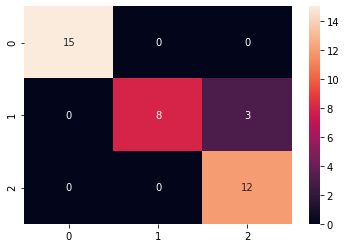

In [85]:
sns.heatmap(cm, annot=True)

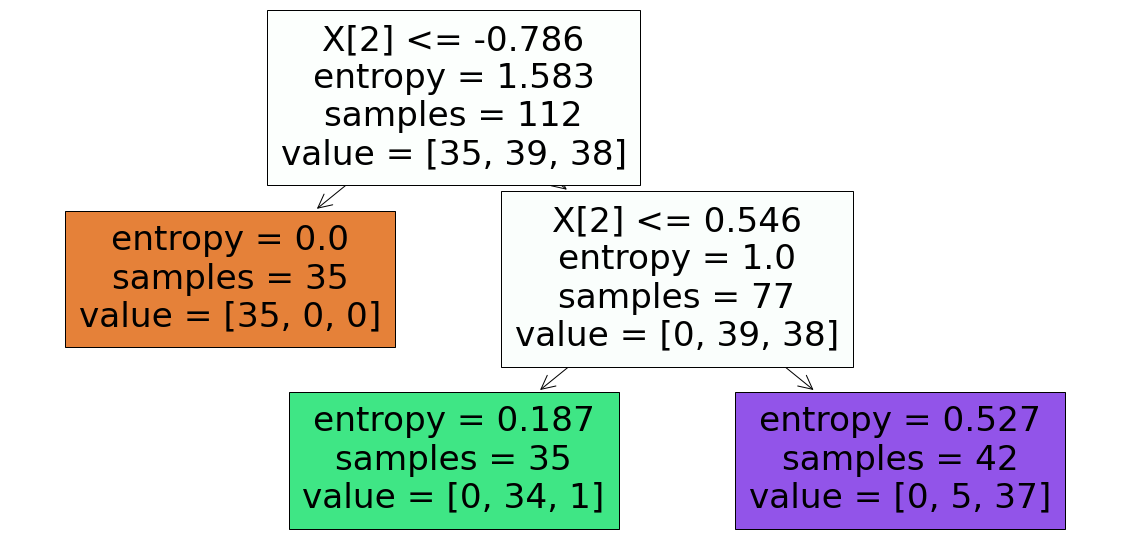

In [86]:
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model,filled=True)
plt.show()